https://portal.hubmapconsortium.org/browse/dataset/4706e0339d507e7bd878458e2e9e7460
HBM254.SJWB.835


https://drive.google.com/file/d/1fyvo7bWH7J2YRDuTVwEEByMAohgyRAqr/view?usp=drive_link




In [96]:
!pip install anndata

In [97]:
!pip install igraph


In [98]:
!pip install scanpy

In [99]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
from scipy.sparse import csr_matrix

In [100]:
import random
random.seed(3047)

In [101]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt


In [102]:
from sklearn.manifold import TSNE

In [103]:
import plotly.express as px

In [104]:
path = '/content/drive/MyDrive/KIB AI/Практики/secondary_analysis(1).h5ad'

In [105]:
df = ad.read_h5ad(path)

In [106]:
df

AnnData object with n_obs × n_vars = 250 × 13626
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

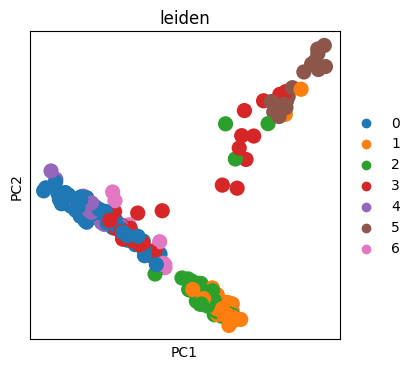

In [107]:
sc.pl.pca(df, color = 'leiden')



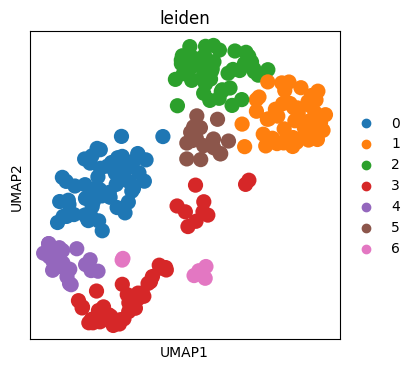

In [108]:
sc.pl.umap(df, color="leiden")

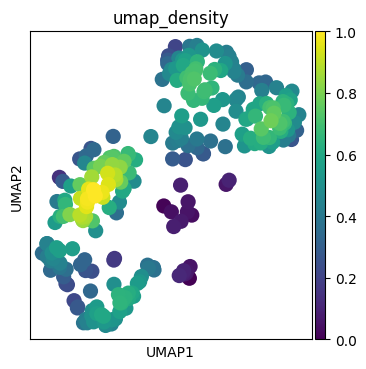

In [109]:
sc.pl.umap(df, color="umap_density")

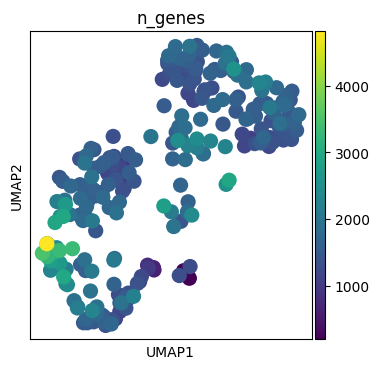

In [110]:
sc.pl.umap(df, color="n_genes")

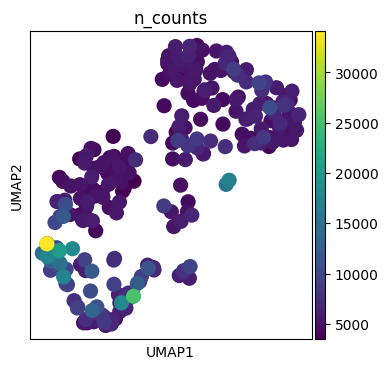

In [111]:
sc.pl.umap(df, color="n_counts")

categories: 0, 1, 2, etc.
var_group_labels: 2


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

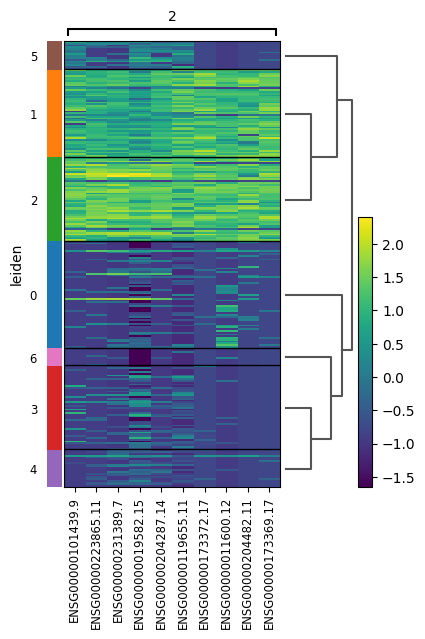

In [112]:
sc.tl.rank_genes_groups(df, "leiden", method="t-test")
sc.pl.rank_genes_groups_heatmap(df, groups="2", n_genes=10, groupby="leiden")

In [113]:
pd_df = df.to_df()

In [114]:
k_genes = 100

In [115]:
random_genes = random.choices(pd_df.columns, k = k_genes)

In [116]:
pd_df[random_genes]

,ENSG00000133612.19,ENSG00000213658.12,ENSG00000185905.4,ENSG00000166326.7,ENSG00000124562.10,ENSG00000164885.13,ENSG00000167920.10,ENSG00000099203.7,ENSG00000223959.8,ENSG00000182871.16,...,ENSG00000287562.1,ENSG00000177700.6,ENSG00000162407.9,ENSG00000280213.1,ENSG00000259007.1,ENSG00000067606.17,ENSG00000105355.9,ENSG00000169188.5,ENSG00000188223.9,ENSG00000249936.3
AAACGGGAGATATGGT,-0.171591,-0.141292,2.442277,-0.469675,2.359754,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.287992,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
AAACGGGGTCATACTG,-0.171591,-0.141292,-0.481571,-0.469675,1.411691,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,1.679292,-0.211761,-0.238804,-0.121282
AAAGATGTCATCGCTC,-0.171591,-0.141292,1.765446,2.213047,-0.782675,-0.226144,-0.238812,5.254299,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,2.617413,-0.211761,-0.238804,-0.121282
AAAGCAAAGTTCGCAT,-0.171591,-0.141292,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.505898,4.963413,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
AAATGCCGTGTGACGA,-0.171591,-0.141292,1.208554,-0.469675,-0.782675,-0.226144,3.297958,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,1.778454,-0.211761,-0.238804,-0.121282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGCAAAGAAGGCCT,-0.171591,-0.141292,-0.481571,1.878270,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.930131,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
TTTATGCGTCACAAGG,-0.171591,-0.141292,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,5.983725,-0.238804,-0.121282
TTTGCGCAGACTGGGT,6.842173,-0.141292,-0.481571,-0.469675,0.891263,-0.226144,-0.238812,-0.213236,-0.228907,6.193643,...,-0.106917,0.865125,1.774821,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
TTTGGTTTCTGATTCT,-0.171591,6.573651,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282


In [117]:
hm_umap = umap.UMAP(n_neighbors=10)
hm_umap_results = hm_umap.fit_transform(pd_df[random_genes])
hm_umap_results = pd.DataFrame(hm_umap_results, columns = ['UMAP1','UMAP2'])



In [118]:
hm_umap

UMAP(n_neighbors=10, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

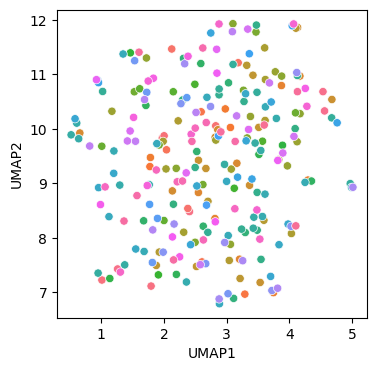

In [119]:
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=hm_umap_results, hue = pd_df.index)
plt.legend([],[], frameon=False)

In [120]:
hm_tsne = TSNE(n_components= 2).fit_transform(pd_df[random_genes])

In [121]:
hm_tsne.shape

(250, 2)

In [122]:
hm_tsne_results = pd.DataFrame(hm_tsne, columns = ['TSNE1','TSNE2'])

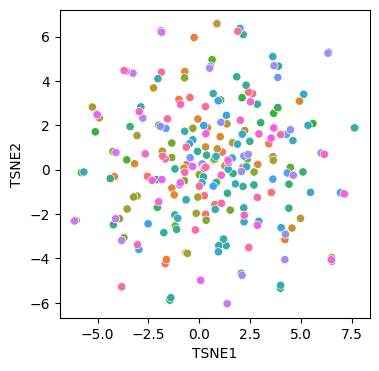

In [123]:
sns_plot = sns.scatterplot(x='TSNE1', y='TSNE2', data=hm_tsne_results , hue = pd_df.index)
plt.legend([],[], frameon=False)

In [124]:
from sklearn.metrics import pairwise_distances
pairwise_dist = pairwise_distances(hm_umap_results, hm_tsne)

In [125]:
dist_df = pd.DataFrame(pairwise_dist)

In [126]:
from sklearn.decomposition import PCA

In [127]:
hm_pca = PCA(n_components= 2)

In [128]:
reduced_data = hm_pca.fit_transform(pd_df[random_genes])
hm_pca_results = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

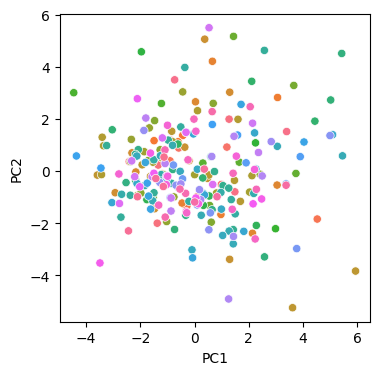

In [129]:
sns_plot = sns.scatterplot(x='PC1', y='PC2', data=hm_pca_results, hue = pd_df.index)
plt.legend([],[], frameon=False)

In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [131]:
seed = 1337
torch.manual_seed(seed)
lr = 1e-3
criterion = torch.nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [132]:
class AE(nn.Module):
   def __init__(self):
       super().__init__()
       self.encoder = nn.Sequential(
           nn.Linear(k_genes, 25),
           nn.Tanh(),
           nn.Linear(25, 2),
           nn.Tanh(),
       )
       self.decoder = nn.Sequential(
           nn.Linear(2, 25),
           nn.Tanh(),
           nn.Linear(25, k_genes),
           nn.Tanh(),
       )

   def forward(self, x):
       encoded = self.encoder(x)
       decoded = self.decoder(encoded)
       return encoded, decoded

In [133]:
pd_df[random_genes]

,ENSG00000133612.19,ENSG00000213658.12,ENSG00000185905.4,ENSG00000166326.7,ENSG00000124562.10,ENSG00000164885.13,ENSG00000167920.10,ENSG00000099203.7,ENSG00000223959.8,ENSG00000182871.16,...,ENSG00000287562.1,ENSG00000177700.6,ENSG00000162407.9,ENSG00000280213.1,ENSG00000259007.1,ENSG00000067606.17,ENSG00000105355.9,ENSG00000169188.5,ENSG00000188223.9,ENSG00000249936.3
AAACGGGAGATATGGT,-0.171591,-0.141292,2.442277,-0.469675,2.359754,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.287992,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
AAACGGGGTCATACTG,-0.171591,-0.141292,-0.481571,-0.469675,1.411691,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,1.679292,-0.211761,-0.238804,-0.121282
AAAGATGTCATCGCTC,-0.171591,-0.141292,1.765446,2.213047,-0.782675,-0.226144,-0.238812,5.254299,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,2.617413,-0.211761,-0.238804,-0.121282
AAAGCAAAGTTCGCAT,-0.171591,-0.141292,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.505898,4.963413,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
AAATGCCGTGTGACGA,-0.171591,-0.141292,1.208554,-0.469675,-0.782675,-0.226144,3.297958,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,1.778454,-0.211761,-0.238804,-0.121282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGCAAAGAAGGCCT,-0.171591,-0.141292,-0.481571,1.878270,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,0.930131,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
TTTATGCGTCACAAGG,-0.171591,-0.141292,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,5.983725,-0.238804,-0.121282
TTTGCGCAGACTGGGT,6.842173,-0.141292,-0.481571,-0.469675,0.891263,-0.226144,-0.238812,-0.213236,-0.228907,6.193643,...,-0.106917,0.865125,1.774821,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282
TTTGGTTTCTGATTCT,-0.171591,6.573651,-0.481571,-0.469675,-0.782675,-0.226144,-0.238812,-0.213236,-0.228907,-0.226062,...,-0.106917,-1.090882,-0.253653,-0.109788,-0.128482,-0.123888,-0.315965,-0.211761,-0.238804,-0.121282


In [134]:
train_d, test_d = torch.utils.data.random_split(pd_df[random_genes].to_numpy(), [200, 50])
train_data = DataLoader(train_d, batch_size = 16)
test_data = DataLoader(test_d, batch_size = 16)

In [135]:
print(train_data)

In [136]:
ae = AE()
n_epoch = 50
optimizer = torch.optim.Adam(ae.parameters(), lr = lr)
train_loss = []
eval_loss = []
for epoch in range(n_epoch):
  ae.train()
  for batch in train_data:
    _, output_r = ae(batch)
    loss_value = criterion(output_r, batch)
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
  train_loss.append(loss_value.item())

  ae.eval()
  with torch.no_grad():
    for batch in test_data:
      _, output_r = ae(batch)
      loss_value_eval = criterion(output_r, batch)
  eval_loss.append(loss_value_eval)
  print(f'epoch [{epoch + 1} / {n_epoch}], loss: {loss_value.item():4f}, eval_loss: {loss_value_eval.item(): 4f}')


epoch [1 / 50], loss: 0.924936, eval_loss:  0.830408
epoch [2 / 50], loss: 0.899279, eval_loss:  0.809931
epoch [3 / 50], loss: 0.882355, eval_loss:  0.797622
epoch [4 / 50], loss: 0.871825, eval_loss:  0.790727
epoch [5 / 50], loss: 0.865244, eval_loss:  0.786853
epoch [6 / 50], loss: 0.860928, eval_loss:  0.784570
epoch [7 / 50], loss: 0.857863, eval_loss:  0.783237
epoch [8 / 50], loss: 0.855461, eval_loss:  0.782606
epoch [9 / 50], loss: 0.853394, eval_loss:  0.782503
epoch [10 / 50], loss: 0.851487, eval_loss:  0.782722
epoch [11 / 50], loss: 0.849656, eval_loss:  0.783042
epoch [12 / 50], loss: 0.847866, eval_loss:  0.783293
epoch [13 / 50], loss: 0.846110, eval_loss:  0.783387
epoch [14 / 50], loss: 0.844399, eval_loss:  0.783315
epoch [15 / 50], loss: 0.842749, eval_loss:  0.783117
epoch [16 / 50], loss: 0.841175, eval_loss:  0.782849
epoch [17 / 50], loss: 0.839689, eval_loss:  0.782556
epoch [18 / 50], loss: 0.838291, eval_loss:  0.782254
epoch [19 / 50], loss: 0.836968, eval

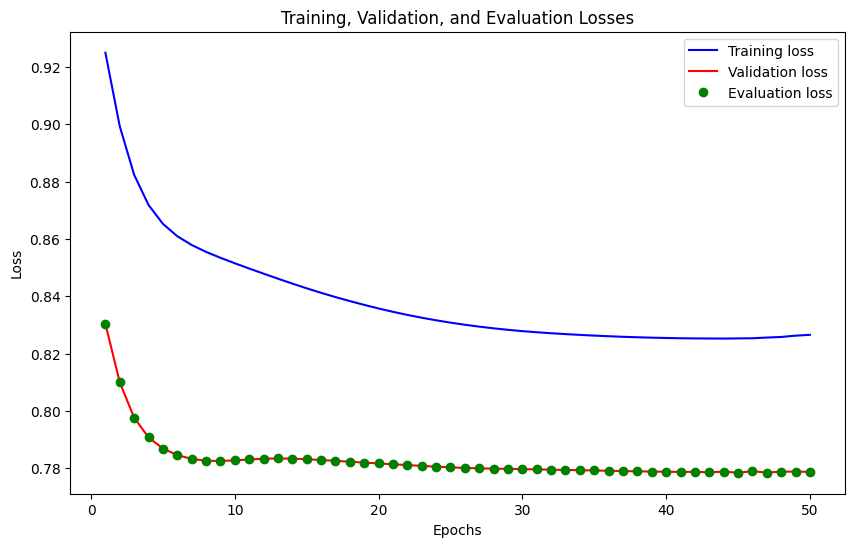

In [137]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, eval_loss, 'r', label='Validation loss')
plt.plot(epochs, eval_loss, 'go', label='Evaluation loss')  # 'go' for green circle marker

plt.title('Training, Validation, and Evaluation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [138]:
ae.eval()
data = pd_df[random_genes]
ae_hmap = []
with torch.no_grad():
  for i in data.index:
    embs, _ = ae(torch.tensor(data.loc[i]))
    ae_hmap.append(embs.numpy())
ae_hmap = np.array(ae_hmap)

<ipython-input-138-0871ee78a34d>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  embs, _ = ae(torch.tensor(data.loc[i]))


In [139]:
ae_hmap.shape

(250, 2)

In [140]:
hm_ae_results = pd.DataFrame(ae_hmap, columns=['AE1', 'AE2'])

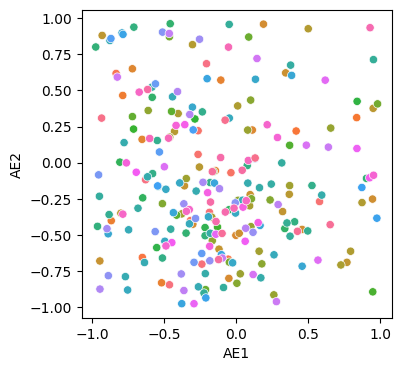

In [141]:
sns_plot = sns.scatterplot(x='AE1', y='AE2', data=hm_ae_results, hue = pd_df.index)
plt.legend([],[], frameon=False)

In [142]:
hm_umap_results, hm_ae_results, hm_pca_results, hm_tsne_results

(        UMAP1      UMAP2
 0    1.260650   7.426407
 1    2.407491   8.480462
 2    1.794990   7.112382
 3    1.010491   7.223690
 4    1.973870   9.830253
 ..        ...        ...
 245  4.129879  10.683245
 246  4.104288   8.218431
 247  3.600081  10.070459
 248  4.562603  10.329223
 249  4.537325  10.683613
 
 [250 rows x 2 columns],
           AE1       AE2
 0   -0.936670  0.308192
 1   -0.207824  0.684303
 2   -0.631103 -0.118146
 3   -0.465197 -0.844414
 4   -0.240132 -0.701669
 ..        ...       ...
 245 -0.099779 -0.489356
 246  0.651256 -0.428815
 247  0.424106 -0.474588
 248 -0.078473  0.293916
 249  0.130075  0.032282
 
 [250 rows x 2 columns],
           PC1       PC2
 0    3.398849  1.514591
 1    1.487531 -0.797194
 2    1.274454  1.991235
 3   -1.376338 -2.000802
 4   -1.339605  0.229836
 ..        ...       ...
 245 -1.150392 -0.594026
 246 -2.437910 -2.295246
 247 -2.106097 -0.985468
 248 -1.125979  0.535338
 249 -0.733815  3.499509
 
 [250 rows x 2 columns],
       

In [143]:
class DAE(nn.Module):
  def __init__(self):
      super().__init__()
      self.encoder = nn.Sequential(
          nn.Linear(k_genes, 25),
          nn.Tanh(),
          nn.Linear(25, 2),
          nn.Tanh(),
      )
      self.decoder = nn.Sequential(
          nn.Linear(2, 25),
          nn.Tanh(),
          nn.Linear(25, k_genes),
          nn.Tanh(),
      )

  def forward(self, x):
      # Add noise to the input data
      noise = torch.randn_like(x) * 0.1
      x_noisy = x + noise

      encoded = self.encoder(x_noisy)
      decoded = self.decoder(encoded)
      return encoded, decoded

In [144]:
dae = DAE()
n_epoch =  50
optimizer = torch.optim.Adam(dae.parameters(), lr = lr)
train_loss = []
eval_loss = []
for epoch in range(n_epoch):
 dae.train()
 for batch in train_data:
   _, output_r = dae(batch)
   loss_value = criterion(output_r, batch)
   optimizer.zero_grad()
   loss_value.backward()
   optimizer.step()
 train_loss.append(loss_value.item())

 dae.eval()
 with torch.no_grad():
   for batch in test_data:
     _, output_r = dae(batch)
     loss_value_eval = criterion(output_r, batch)
 eval_loss.append(loss_value_eval)
 print(f'epoch [{epoch + 1} / {n_epoch}], loss: {loss_value.item():4f}, eval_loss: {loss_value_eval.item(): 4f}')


epoch [1 / 50], loss: 0.916359, eval_loss:  0.813829
epoch [2 / 50], loss: 0.890997, eval_loss:  0.800005
epoch [3 / 50], loss: 0.876243, eval_loss:  0.793183
epoch [4 / 50], loss: 0.868038, eval_loss:  0.789158
epoch [5 / 50], loss: 0.863248, eval_loss:  0.787657
epoch [6 / 50], loss: 0.859829, eval_loss:  0.786050
epoch [7 / 50], loss: 0.856878, eval_loss:  0.783444
epoch [8 / 50], loss: 0.855057, eval_loss:  0.781874
epoch [9 / 50], loss: 0.852822, eval_loss:  0.779819
epoch [10 / 50], loss: 0.851169, eval_loss:  0.775995
epoch [11 / 50], loss: 0.849923, eval_loss:  0.775521
epoch [12 / 50], loss: 0.848530, eval_loss:  0.774325
epoch [13 / 50], loss: 0.847057, eval_loss:  0.773978
epoch [14 / 50], loss: 0.846499, eval_loss:  0.771672
epoch [15 / 50], loss: 0.845604, eval_loss:  0.770847
epoch [16 / 50], loss: 0.844382, eval_loss:  0.770833
epoch [17 / 50], loss: 0.844072, eval_loss:  0.770251
epoch [18 / 50], loss: 0.842860, eval_loss:  0.770248
epoch [19 / 50], loss: 0.841920, eval

In [145]:
multiplier = 2
multiplied_data = torch.repeat_interleave(torch.tensor(pd_df[random_genes].values), multiplier, 0)
train_d, test_d = torch.utils.data.random_split(multiplied_data, [450, 50])

train_data = DataLoader(train_d, batch_size = 16)
test_data = DataLoader(test_d, batch_size = 16)

In [146]:
dae = DAE()
n_epoch =  50
optimizer = torch.optim.Adam(dae.parameters(), lr = lr)
train_loss = []
eval_loss = []
for epoch in range(n_epoch):
 dae.train()
 for batch in train_data:
   _, output_r = dae(batch)
   loss_value = criterion(output_r, batch)
   optimizer.zero_grad()
   loss_value.backward()
   optimizer.step()
 train_loss.append(loss_value.item())

 dae.eval()
 with torch.no_grad():
   for batch in test_data:
     _, output_r = dae(batch)
     loss_value_eval = criterion(output_r, batch)
 eval_loss.append(loss_value_eval)
 print(f'epoch [{epoch + 1} / {n_epoch}], loss: {loss_value.item():4f}, eval_loss: {loss_value_eval.item(): 4f}')


epoch [1 / 50], loss: 0.593032, eval_loss:  0.799945
epoch [2 / 50], loss: 0.564126, eval_loss:  0.785240
epoch [3 / 50], loss: 0.554079, eval_loss:  0.779279
epoch [4 / 50], loss: 0.547001, eval_loss:  0.776628
epoch [5 / 50], loss: 0.541393, eval_loss:  0.776392
epoch [6 / 50], loss: 0.536260, eval_loss:  0.775244
epoch [7 / 50], loss: 0.532224, eval_loss:  0.774714
epoch [8 / 50], loss: 0.529454, eval_loss:  0.774112
epoch [9 / 50], loss: 0.526900, eval_loss:  0.772887
epoch [10 / 50], loss: 0.525574, eval_loss:  0.772146
epoch [11 / 50], loss: 0.525438, eval_loss:  0.770618
epoch [12 / 50], loss: 0.524566, eval_loss:  0.769034
epoch [13 / 50], loss: 0.524305, eval_loss:  0.767719
epoch [14 / 50], loss: 0.525335, eval_loss:  0.766797
epoch [15 / 50], loss: 0.525129, eval_loss:  0.767641
epoch [16 / 50], loss: 0.526725, eval_loss:  0.765523
epoch [17 / 50], loss: 0.527277, eval_loss:  0.764754
epoch [18 / 50], loss: 0.526688, eval_loss:  0.764886
epoch [19 / 50], loss: 0.527965, eval

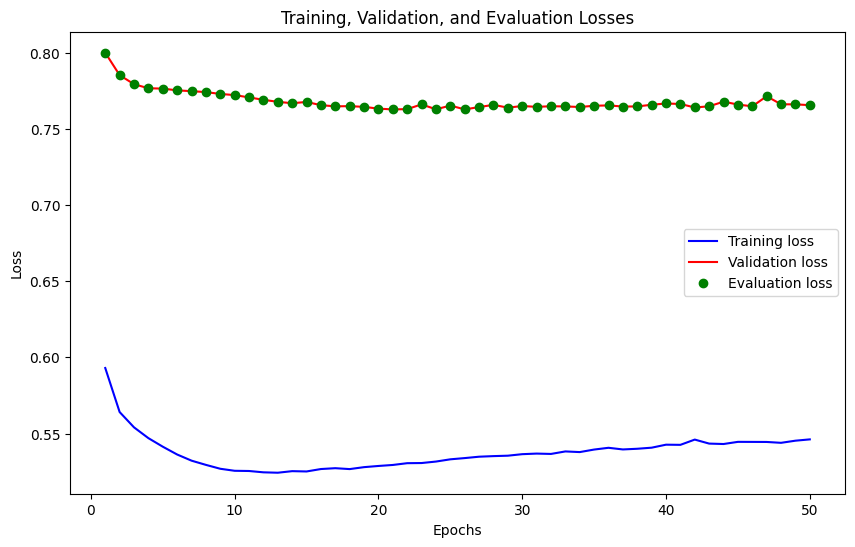

In [147]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, eval_loss, 'r', label='Validation loss')
plt.plot(epochs, eval_loss, 'go', label='Evaluation loss')  # 'go' for green circle marker

plt.title('Training, Validation, and Evaluation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<ipython-input-148-845b8f022f47>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  embs, _ = dae(torch.tensor(data.loc[i]))


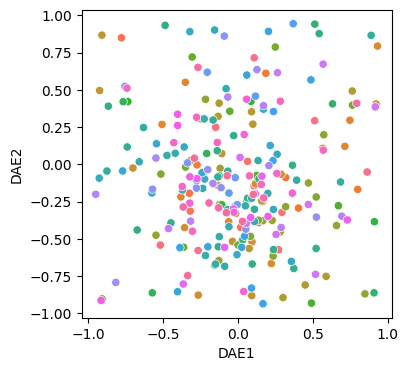

In [148]:
dae.eval()
data = pd_df[random_genes]
dae_hmap = []
with torch.no_grad():
  for i in data.index:
    embs, _ = dae(torch.tensor(data.loc[i]))
    dae_hmap.append(embs.numpy())
dae_hmap = np.array(dae_hmap)
hm_dae_results = pd.DataFrame(dae_hmap, columns=['DAE1', 'DAE2'])
sns_plot = sns.scatterplot(x='DAE1', y='DAE2', data=hm_dae_results, hue = pd_df.index)
plt.legend([],[], frameon=False)

In [149]:
#hm_dae_results, hm_umap_results, hm_ae_results, hm_pca_results, hm_tsne_results

In [150]:
train_d, test_d = torch.utils.data.random_split(pd_df[random_genes].to_numpy(), [200, 50])
train_data = DataLoader(train_d, batch_size = 16)
test_data = DataLoader(test_d, batch_size = 16)

In [151]:
class VAE(nn.Module):
 def __init__(self):
     super().__init__()
     self.encoder = nn.Sequential(
         nn.Linear(k_genes, 50),
         nn.Tanh(),
         nn.Linear(50, 2)
     )
     self.decoder = nn.Sequential(
         nn.Linear(2, 50),
         nn.Tanh(),
         nn.Linear(50, k_genes),
         nn.Tanh(),
     )

 def reparameterize(self, mu, logvar):
     std = torch.exp(0.5*logvar)
     eps = torch.randn_like(std)
     return mu + eps*std

 def forward(self, x):
     mu = self.encoder(x)
     logvar = self.encoder(x)
     z = self.reparameterize(mu, logvar)
     decoded = self.decoder(z)
     return decoded, mu, logvar, z

In [152]:
vae = VAE()
n_epoch = 50
optimizer = torch.optim.Adam(vae.parameters(), lr = lr)
train_loss = []
eval_loss = []
for epoch in range(n_epoch):
 vae.train()
 for batch in train_data:
  output_r, mu, logvar, z = vae(batch)
  reconstruction_loss = criterion(output_r, batch)
  kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  loss_value = reconstruction_loss + kl_loss
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()
 train_loss.append(loss_value.item())

 vae.eval()
 with torch.no_grad():
  for batch in test_data:
    output_r, mu, logvar, z = vae(batch)
    reconstruction_loss = criterion(output_r, batch)
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss_value_eval = reconstruction_loss + kl_loss
 eval_loss.append(loss_value_eval)
 print(f'epoch [{epoch + 1} / {n_epoch}], loss: {loss_value.item():4f}, eval_loss: {loss_value_eval.item(): 4f}')


epoch [1 / 50], loss: 1.227196, eval_loss:  1.066938
epoch [2 / 50], loss: 1.086050, eval_loss:  1.049890
epoch [3 / 50], loss: 1.030703, eval_loss:  1.078392
epoch [4 / 50], loss: 1.001741, eval_loss:  1.040625
epoch [5 / 50], loss: 1.007795, eval_loss:  1.040262
epoch [6 / 50], loss: 0.999543, eval_loss:  1.050875
epoch [7 / 50], loss: 0.993890, eval_loss:  1.025204
epoch [8 / 50], loss: 0.993282, eval_loss:  1.000926
epoch [9 / 50], loss: 0.987279, eval_loss:  0.993128
epoch [10 / 50], loss: 0.988826, eval_loss:  1.004408
epoch [11 / 50], loss: 0.979849, eval_loss:  0.998711
epoch [12 / 50], loss: 0.986545, eval_loss:  1.002828
epoch [13 / 50], loss: 0.984903, eval_loss:  0.992246
epoch [14 / 50], loss: 0.980134, eval_loss:  0.989972
epoch [15 / 50], loss: 0.983637, eval_loss:  1.007385
epoch [16 / 50], loss: 0.995769, eval_loss:  0.992024
epoch [17 / 50], loss: 0.994049, eval_loss:  1.014089
epoch [18 / 50], loss: 0.982311, eval_loss:  0.988833
epoch [19 / 50], loss: 0.986020, eval

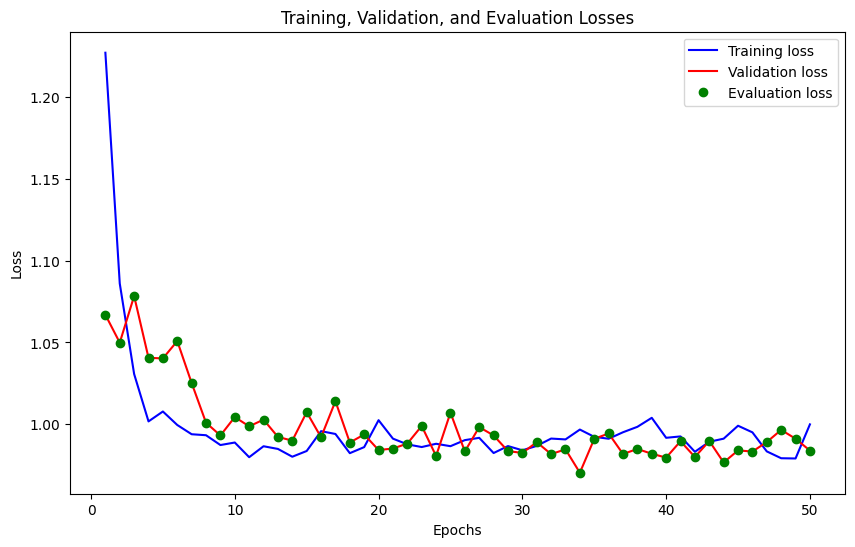

In [153]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, eval_loss, 'r', label='Validation loss')
plt.plot(epochs, eval_loss, 'go', label='Evaluation loss')  # 'go' for green circle marker

plt.title('Training, Validation, and Evaluation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<ipython-input-154-af4d7fa7d49d>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  _,_,_,embs = vae(torch.tensor(data.loc[i]))


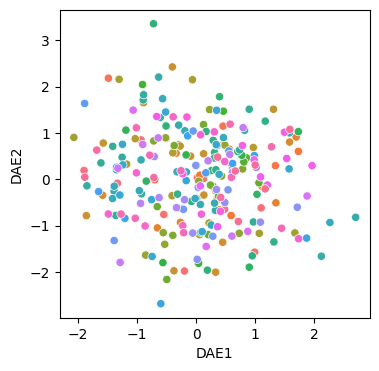

In [154]:
vae.eval()
data = pd_df[random_genes]
vae_hmap = []
with torch.no_grad():
  for i in data.index:
    _,_,_,embs = vae(torch.tensor(data.loc[i]))
    vae_hmap.append(embs.numpy())
vae_hmap = np.array(vae_hmap)
hm_vae_results = pd.DataFrame(vae_hmap, columns=['DAE1', 'DAE2'])
sns_plot = sns.scatterplot(x='DAE1', y='DAE2', data=hm_vae_results, hue = pd_df.index)
plt.legend([],[], frameon=False)